# Analise dos dados

Este notebook tem o objetivo de realizar uma análise exploratória dos dados fornecidos

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Permite o uso de display() para DataFrames

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL YEAR,ORIGIN
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1


In [4]:
df.describe()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL YEAR,ORIGIN
count,398.000000,397.000000,397.000000,391.000000,398.000000,397.000000,397.000000,398.000000
mean,23.514573,5.901763,222.837531,229.521739,2970.424623,15.611083,76.020151,1.572864
std,7.815984,6.708047,503.878449,2471.684259,846.841774,2.838708,3.696790,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.500000,2223.750000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,94.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.000000,3608.000000,17.200000,79.000000,2.000000
max,46.600000,98.000000,9856.000000,48973.000000,5140.000000,29.000000,82.000000,3.000000


Ao olharmos para a tabela contendo uma descrição dos dados podemos ver que as colunas `DISPLACEMENT, HORSEPOWER e WEIGHT` possuem alto valor de desvio padrão bem como um range de valores bem grande se comparada às demais colunas. Vamos analisar a distribuição de cada coluna por meio de gráficos. Primeiro, veremos a frequencia da coluna `ORIGIN`. 

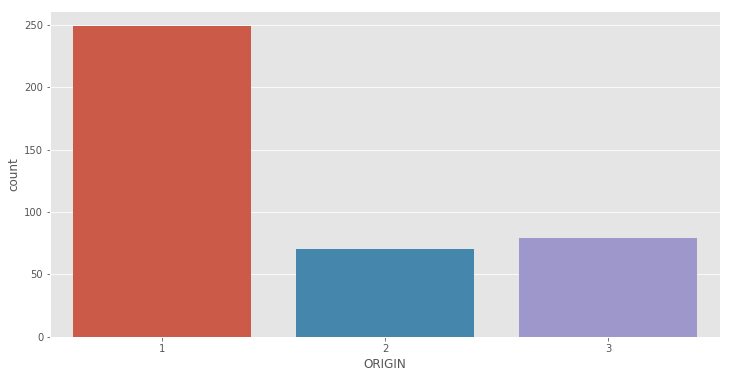

In [23]:
_ = plt.figure(figsize=(12, 6))
_ = sns.countplot(df["ORIGIN"])

Podemos ver que a para `ORIGIN = 1` temos a maior ocorrencia nos dados. Para as demais classes temos uma distribuição mais equilibrada. 

In [18]:
def plotOneVarGraph(var, target, dataframe):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=var, data=dataframe)

    plt.figure(figsize=(12, 6))
    sns.countplot(x=var, data=dataframe, hue=target)


Vamos analisar a distribuição da variável `MPG`. 

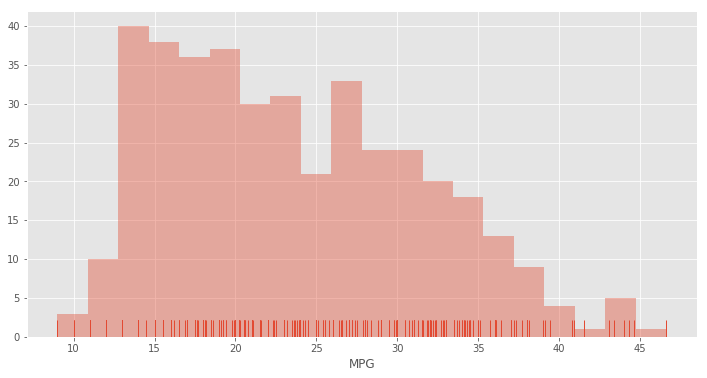

In [30]:
_ = plt.figure(figsize=(12, 6))
_ = sns.distplot(df["MPG"], bins=20, kde=False, rug=True)

Como podemos observar temos uma concentração maior mais a esquerda no gráfico, isto é, existem mais carros com eficiência até cerca de 20 milhas por galão. Se voltarmos à tabela que contém a descrição dos dados veremos que 75% dos casos tem eficiência de até 29 milhas por galão. Vamos analisar duas variáveis ao mesmo tempo para entendermos melhor a base de dados. Para isso iremos plotar um gráfico com uma matriz de dispersão para cada par de atributos. 

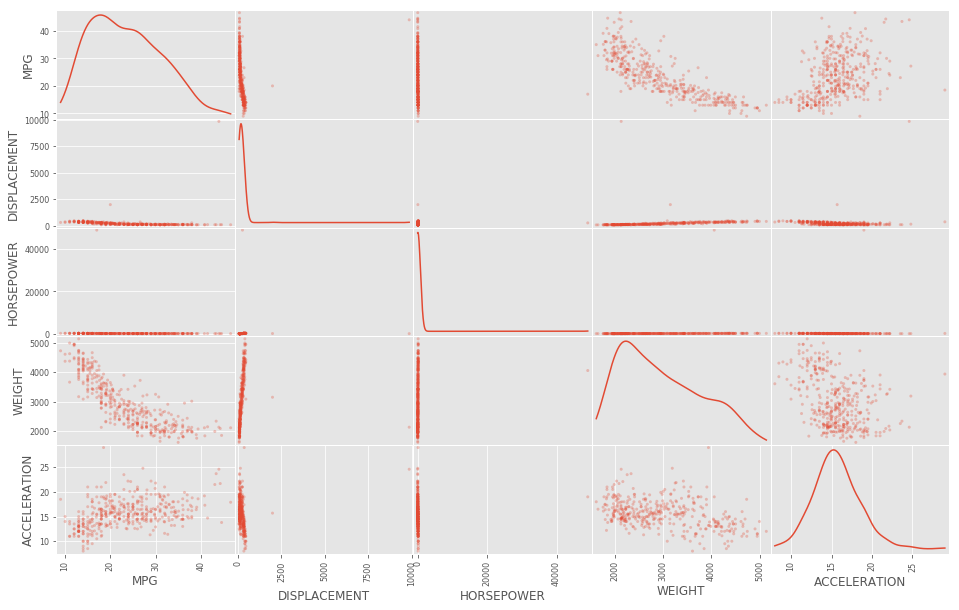

In [33]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
# Antes iremos excluir alguns atributos que apesar de serem numéricos não fazem sentido serem analisados aqui
dfCategorical = df.drop(labels=["ORIGIN", "MODEL YEAR", "CYLINDERS"], axis = 1)
pd.plotting.scatter_matrix(dfCategorical, alpha = 0.3, figsize = (16,10), diagonal = 'kde', );

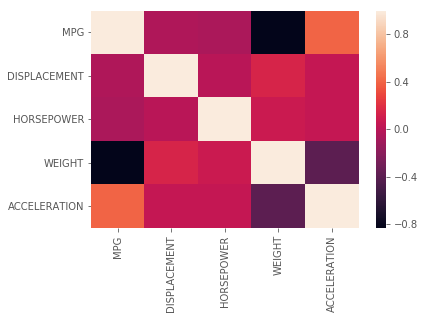

In [35]:
_ = sns.heatmap(dfCategorical.corr())

Podemos ver uma certa relação entre os pares de variáveis `MPG` e `WEIGHT` e `MPG` e `ACCELERATION`. Com o auxilio do gráfico de correlação, podemos ver também que as variáveis `ACCELERATION` e `WEIGHT` possuem uma correlação negativa. É intuitivo pensar que quanto maior o valor para `WEIGHT`, menor deva ser o valor para `MPG`, já que a autonomia diminuirá. Isto é confirmado ao vermos a correlação negativa destas duas variáveis. Vamos normalizar estes dados e visualizar a mesma matriz de dispersão. 

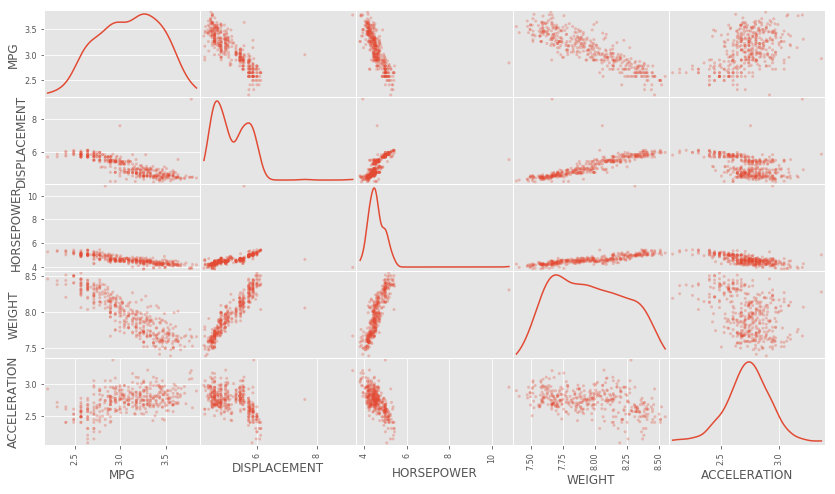

In [37]:
log_data = np.log(dfCategorical)
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [39]:
log_data.describe()

,MPG,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION
count,398.000000,397.000000,391.000000,398.000000,397.000000
mean,3.101384,5.142251,4.604325,7.956890,2.731418
std,0.339656,0.582121,0.465380,0.280665,0.183555
min,2.197225,4.219508,3.828641,7.385851,2.079442
25%,2.862201,4.653960,4.324111,7.706950,2.631889
50%,3.135494,5.017280,4.543295,7.938623,2.740840
75%,3.367296,5.710427,4.859812,8.190909,2.844909
max,3.841601,9.195836,10.799024,8.544808,3.367296


###  Detecção de valores  (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

In [52]:
# # Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
# for feature in log_data.keys():
    
#     # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
#     Q1 = np.percentile(log_data[feature], 25.0)
    
#     # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
#     Q3 =  np.percentile(log_data[feature], 75.0)
    
#     # Utiliza a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
#     step = 1.5 * (Q3 - Q1)
    
#     # Mostra os discrepantes
#     print ("Data points considered outliers for the feature '{}':".format(feature))
#     display(log_data[((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# # OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
# # outliers  = [65, 66, 75, 128, 154]

# # Remova os valores atí, caso nenhum tenha sido especificado
# # good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
